In [92]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import plotly.graph_objs as go
import seaborn as sb
import statistics as sta

In [93]:
#Reading parquet dataframe
final_data=pd.read_parquet('../../../data/final_covid_data.parquet.gzip', engine='pyarrow')
final_data

,countyFIPS,County Name,State,StateFIPS,date,confirmed,deaths,population
0,0,statewide unallocated,AL,1,2020-01-22,0,0,0
1,0,statewide unallocated,AL,1,2020-01-23,0,0,0
2,0,statewide unallocated,AL,1,2020-01-24,0,0,0
3,0,statewide unallocated,AL,1,2020-01-25,0,0,0
4,0,statewide unallocated,AL,1,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
1797496,56045,weston county,WY,56,2021-08-12,700,6,6927
1797497,56045,weston county,WY,56,2021-08-13,700,6,6927
1797498,56045,weston county,WY,56,2021-08-14,705,6,6927
1797499,56045,weston county,WY,56,2021-08-15,705,6,6927


In [94]:
#Removing unallocated statewide data
final_data=final_data[final_data['County Name']!='statewide unallocated']
final_data

,countyFIPS,County Name,State,StateFIPS,date,confirmed,deaths,population
573,1001,autauga county,AL,1,2020-01-22,0,0,55869
574,1001,autauga county,AL,1,2020-01-23,0,0,55869
575,1001,autauga county,AL,1,2020-01-24,0,0,55869
576,1001,autauga county,AL,1,2020-01-25,0,0,55869
577,1001,autauga county,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
1797496,56045,weston county,WY,56,2021-08-12,700,6,6927
1797497,56045,weston county,WY,56,2021-08-13,700,6,6927
1797498,56045,weston county,WY,56,2021-08-14,705,6,6927
1797499,56045,weston county,WY,56,2021-08-15,705,6,6927


In [95]:
#Selecting a Specific State
north_carolina_covid_details=final_data[final_data['State']=='NC']
#groping the data by 'date'
north_carolina_covid_details=north_carolina_covid_details.groupby(["date"]).sum().reset_index()
north_carolina_covid_details

,date,countyFIPS,StateFIPS,confirmed,deaths,population
0,2020-01-22,3710000,3700,0,0,10488084
1,2020-01-23,3710000,3700,0,0,10488084
2,2020-01-24,3710000,3700,0,0,10488084
3,2020-01-25,3710000,3700,0,0,10488084
4,2020-01-26,3710000,3700,0,0,10488084
...,...,...,...,...,...,...
568,2021-08-12,3710000,3700,1100775,13806,10488084
569,2021-08-13,3710000,3700,1107306,13826,10488084
570,2021-08-14,3710000,3700,1107306,13826,10488084
571,2021-08-15,3710000,3700,1107306,13826,10488084


In [96]:
#deleting a column
del north_carolina_covid_details['countyFIPS']

In [97]:
#deleting a column
del north_carolina_covid_details['StateFIPS']

In [98]:
north_carolina_covid_details

,date,confirmed,deaths,population
0,2020-01-22,0,0,10488084
1,2020-01-23,0,0,10488084
2,2020-01-24,0,0,10488084
3,2020-01-25,0,0,10488084
4,2020-01-26,0,0,10488084
...,...,...,...,...
568,2021-08-12,1100775,13806,10488084
569,2021-08-13,1107306,13826,10488084
570,2021-08-14,1107306,13826,10488084
571,2021-08-15,1107306,13826,10488084


In [99]:
#Converting dates column into weeks column using groupby() function
north_carolina_covid_details= north_carolina_covid_details.groupby([pd.Grouper(key='date', freq='w')])['confirmed','deaths','population'].agg({'confirmed':'sum','deaths' :'sum','population' : 'sum'}).reset_index().round(decimals=0)
north_carolina_covid_details

C:\Users\hp\AppData\Local\Temp\ipykernel_12672\916482782.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  north_carolina_covid_details= north_carolina_covid_details.groupby([pd.Grouper(key='date', freq='w')])['confirmed','deaths','population'].agg({'confirmed':'sum','deaths' :'sum','population' : 'sum'}).reset_index().round(decimals=0)


,date,confirmed,deaths,population
0,2020-01-26,0,0,52440420
1,2020-02-02,0,0,73416588
2,2020-02-09,0,0,73416588
3,2020-02-16,0,0,73416588
4,2020-02-23,0,0,73416588
...,...,...,...,...
78,2021-07-25,7206370,94898,73416588
79,2021-08-01,7307060,95299,73416588
80,2021-08-08,7461624,96020,73416588
81,2021-08-15,7694322,96601,73416588


In [100]:
#Columns 'New Cases Per Day' and 'New Deaths Per Day' are created using .diff() function
north_carolina_covid_details['New Cases Per Day'] = north_carolina_covid_details['confirmed'].diff()
north_carolina_covid_details['New Deaths Per Day'] = north_carolina_covid_details['deaths'].diff()
north_carolina_covid_details

,date,confirmed,deaths,population,New Cases Per Day,New Deaths Per Day
0,2020-01-26,0,0,52440420,NaN,NaN
1,2020-02-02,0,0,73416588,0.0,0.0
2,2020-02-09,0,0,73416588,0.0,0.0
3,2020-02-16,0,0,73416588,0.0,0.0
4,2020-02-23,0,0,73416588,0.0,0.0
...,...,...,...,...,...,...
78,2021-07-25,7206370,94898,73416588,55925.0,287.0
79,2021-08-01,7307060,95299,73416588,100690.0,401.0
80,2021-08-08,7461624,96020,73416588,154564.0,721.0
81,2021-08-15,7694322,96601,73416588,232698.0,581.0


In [101]:
#mean of New Cases Per Day
mean_new_cases_NC=north_carolina_covid_details['New Cases Per Day'].mean()
mean_new_cases_NC

13687.829268292682

In [102]:
#median of New Cases Per Day
median_new_cases_NC=north_carolina_covid_details['New Cases Per Day'].median()
median_new_cases_NC

76808.5

In [103]:
#mode of New Cases Per Day
mode_new_cases_NC=north_carolina_covid_details['New Cases Per Day'].mode()
mode_new_cases_NC

0    0.0
Name: New Cases Per Day, dtype: float64

In [104]:
#mean of New Deaths Per Day
mean_new_deaths_NC=north_carolina_covid_details['New Deaths Per Day'].mean()
mean_new_deaths_NC

169.26829268292684

In [105]:
#median of New Deaths Per Day
median_new_deaths_NC=north_carolina_covid_details['New Deaths Per Day'].median()
median_new_deaths_NC

883.0

In [106]:
#mode of New Deaths Per Day
mode_new_deaths_NC=north_carolina_covid_details['New Deaths Per Day'].mode()
mode_new_deaths_NC

0    0.0
Name: New Deaths Per Day, dtype: float64

In [107]:
#Normalize by population
north_carolina_covid_details['New Cases per day (Normalized)']= round((north_carolina_covid_details['confirmed']/north_carolina_covid_details['population'])*100000)
north_carolina_covid_details['New Deaths per day (Normalized)']= round((north_carolina_covid_details['deaths']/north_carolina_covid_details['population'])*100000)
north_carolina_covid_details

,date,confirmed,deaths,population,New Cases Per Day,New Deaths Per Day,New Cases per day (Normalized),New Deaths per day (Normalized)
0,2020-01-26,0,0,52440420,NaN,NaN,0.0,0.0
1,2020-02-02,0,0,73416588,0.0,0.0,0.0,0.0
2,2020-02-09,0,0,73416588,0.0,0.0,0.0,0.0
3,2020-02-16,0,0,73416588,0.0,0.0,0.0,0.0
4,2020-02-23,0,0,73416588,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
78,2021-07-25,7206370,94898,73416588,55925.0,287.0,9816.0,129.0
79,2021-08-01,7307060,95299,73416588,100690.0,401.0,9953.0,130.0
80,2021-08-08,7461624,96020,73416588,154564.0,721.0,10163.0,131.0
81,2021-08-15,7694322,96601,73416588,232698.0,581.0,10480.0,132.0


In [108]:
north_carolina_covid_details.rename({'date': 'weeks'}, axis=1, inplace=True)
north_carolina_covid_details

,weeks,confirmed,deaths,population,New Cases Per Day,New Deaths Per Day,New Cases per day (Normalized),New Deaths per day (Normalized)
0,2020-01-26,0,0,52440420,NaN,NaN,0.0,0.0
1,2020-02-02,0,0,73416588,0.0,0.0,0.0,0.0
2,2020-02-09,0,0,73416588,0.0,0.0,0.0,0.0
3,2020-02-16,0,0,73416588,0.0,0.0,0.0,0.0
4,2020-02-23,0,0,73416588,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
78,2021-07-25,7206370,94898,73416588,55925.0,287.0,9816.0,129.0
79,2021-08-01,7307060,95299,73416588,100690.0,401.0,9953.0,130.0
80,2021-08-08,7461624,96020,73416588,154564.0,721.0,10163.0,131.0
81,2021-08-15,7694322,96601,73416588,232698.0,581.0,10480.0,132.0


In [109]:
#mean of New Cases per day (Normalized) 
north_carolina_covid_details['New Cases per day (Normalized)'].mean()

4299.120481927711

In [110]:
#mean of New Deaths per day (Normalized)
north_carolina_covid_details['New Deaths per day (Normalized)'].mean()

57.734939759036145

In [111]:
#median of New Cases per day (Normalized)
north_carolina_covid_details['New Cases per day (Normalized)'].median()

2714.0

In [112]:
#median of New Deaths per day (Normalized)
north_carolina_covid_details['New Deaths per day (Normalized)'].median()

43.0

In [113]:
#mode of New Cases per day (Normalized)
north_carolina_covid_details['New Cases per day (Normalized)'].mode()

0    0.0
Name: New Cases per day (Normalized), dtype: float64

In [114]:
#mode of New Deaths per day (Normalized)
north_carolina_covid_details['New Deaths per day (Normalized)'].mode()

0    0.0
Name: New Deaths per day (Normalized), dtype: float64

In [115]:
#Selecting random five states
five_states_data=['MI','NY','WY','AL','CA']

In [116]:
five_states_details= final_data[final_data['State'].isin(five_states_data)]
five_states_details

,countyFIPS,County Name,State,StateFIPS,date,confirmed,deaths,population
573,1001,autauga county,AL,1,2020-01-22,0,0,55869
574,1001,autauga county,AL,1,2020-01-23,0,0,55869
575,1001,autauga county,AL,1,2020-01-24,0,0,55869
576,1001,autauga county,AL,1,2020-01-25,0,0,55869
577,1001,autauga county,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
1797496,56045,weston county,WY,56,2021-08-12,700,6,6927
1797497,56045,weston county,WY,56,2021-08-13,700,6,6927
1797498,56045,weston county,WY,56,2021-08-14,705,6,6927
1797499,56045,weston county,WY,56,2021-08-15,705,6,6927


In [117]:
del five_states_details['countyFIPS']

In [118]:
del five_states_details['StateFIPS']

In [119]:
final_five_states_details=five_states_details
final_five_states_details

,County Name,State,date,confirmed,deaths,population
573,autauga county,AL,2020-01-22,0,0,55869
574,autauga county,AL,2020-01-23,0,0,55869
575,autauga county,AL,2020-01-24,0,0,55869
576,autauga county,AL,2020-01-25,0,0,55869
577,autauga county,AL,2020-01-26,0,0,55869
...,...,...,...,...,...,...
1797496,weston county,WY,2021-08-12,700,6,6927
1797497,weston county,WY,2021-08-13,700,6,6927
1797498,weston county,WY,2021-08-14,705,6,6927
1797499,weston county,WY,2021-08-15,705,6,6927


In [120]:
five_states_details1 = final_five_states_details.groupby(['State','date']).sum().reset_index()
five_states_details1

,State,date,confirmed,deaths,population
0,AL,2020-01-22,0,0,4903185
1,AL,2020-01-23,0,0,4903185
2,AL,2020-01-24,0,0,4903185
3,AL,2020-01-25,0,0,4903185
4,AL,2020-01-26,0,0,4903185
...,...,...,...,...,...
2860,WY,2021-08-12,67582,793,578759
2861,WY,2021-08-13,67956,793,578759
2862,WY,2021-08-14,68272,793,578759
2863,WY,2021-08-15,68272,793,578759


In [121]:
five_states_details1= five_states_details1.groupby(['State', pd.Grouper(key='date', freq='w')])['State', 'confirmed','deaths','population'].agg({'confirmed':'sum','deaths' :'sum','population' : 'sum'}).reset_index().round(decimals=0)
five_states_details1

C:\Users\hp\AppData\Local\Temp\ipykernel_12672\3970828995.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  five_states_details1= five_states_details1.groupby(['State', pd.Grouper(key='date', freq='w')])['State', 'confirmed','deaths','population'].agg({'confirmed':'sum','deaths' :'sum','population' : 'sum'}).reset_index().round(decimals=0)


,State,date,confirmed,deaths,population
0,AL,2020-01-26,0,0,24515925
1,AL,2020-02-02,0,0,34322295
2,AL,2020-02-09,0,0,34322295
3,AL,2020-02-16,0,0,34322295
4,AL,2020-02-23,0,0,34322295
...,...,...,...,...,...
410,WY,2021-07-25,448431,5356,4051313
411,WY,2021-08-01,453861,5412,4051313
412,WY,2021-08-08,462446,5492,4051313
413,WY,2021-08-15,473187,5544,4051313


In [122]:
five_states_details1['New Cases Per week'] = five_states_details1['confirmed'].diff()
five_states_details1['New Deaths Per week'] = five_states_details1['deaths'].diff()
five_states_details1

,State,date,confirmed,deaths,population,New Cases Per week,New Deaths Per week
0,AL,2020-01-26,0,0,24515925,NaN,NaN
1,AL,2020-02-02,0,0,34322295,0.0,0.0
2,AL,2020-02-09,0,0,34322295,0.0,0.0
3,AL,2020-02-16,0,0,34322295,0.0,0.0
4,AL,2020-02-23,0,0,34322295,0.0,0.0
...,...,...,...,...,...,...,...
410,WY,2021-07-25,448431,5356,4051313,4703.0,45.0
411,WY,2021-08-01,453861,5412,4051313,5430.0,56.0
412,WY,2021-08-08,462446,5492,4051313,8585.0,80.0
413,WY,2021-08-15,473187,5544,4051313,10741.0,52.0


In [123]:
five_states_details1['New Cases Per week(normalized)'] = (five_states_details1['confirmed']/five_states_details1['population'])*100000
five_states_details1['New Deaths Per week(normalized)'] = (five_states_details1['deaths']/five_states_details1['population'])*100000
five_states_details1

,State,date,confirmed,deaths,population,New Cases Per week,New Deaths Per week,New Cases Per week(normalized),New Deaths Per week(normalized)
0,AL,2020-01-26,0,0,24515925,NaN,NaN,0.000000,0.000000
1,AL,2020-02-02,0,0,34322295,0.0,0.0,0.000000,0.000000
2,AL,2020-02-09,0,0,34322295,0.0,0.0,0.000000,0.000000
3,AL,2020-02-16,0,0,34322295,0.0,0.0,0.000000,0.000000
4,AL,2020-02-23,0,0,34322295,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
410,WY,2021-07-25,448431,5356,4051313,4703.0,45.0,11068.781899,132.204053
411,WY,2021-08-01,453861,5412,4051313,5430.0,56.0,11202.812520,133.586321
412,WY,2021-08-08,462446,5492,4051313,8585.0,80.0,11414.719129,135.560990
413,WY,2021-08-15,473187,5544,4051313,10741.0,52.0,11679.843053,136.844524


In [124]:
five_states_details1.rename({'date': 'weeks'}, axis=1, inplace=True)
five_states_details1

,State,weeks,confirmed,deaths,population,New Cases Per week,New Deaths Per week,New Cases Per week(normalized),New Deaths Per week(normalized)
0,AL,2020-01-26,0,0,24515925,NaN,NaN,0.000000,0.000000
1,AL,2020-02-02,0,0,34322295,0.0,0.0,0.000000,0.000000
2,AL,2020-02-09,0,0,34322295,0.0,0.0,0.000000,0.000000
3,AL,2020-02-16,0,0,34322295,0.0,0.0,0.000000,0.000000
4,AL,2020-02-23,0,0,34322295,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
410,WY,2021-07-25,448431,5356,4051313,4703.0,45.0,11068.781899,132.204053
411,WY,2021-08-01,453861,5412,4051313,5430.0,56.0,11202.812520,133.586321
412,WY,2021-08-08,462446,5492,4051313,8585.0,80.0,11414.719129,135.560990
413,WY,2021-08-15,473187,5544,4051313,10741.0,52.0,11679.843053,136.844524


In [125]:
five_states_details1['New Cases Per week(normalized)'].mean()

4704.907724867744

In [126]:
five_states_details1['New Deaths Per week(normalized)'].mean()

101.36799513518108

In [127]:
five_states_details1['New Cases Per week(normalized)'].median()

2979.850321491268

In [128]:
five_states_details1['New Deaths Per week(normalized)'].median()

86.66961227388786

In [129]:
five_states_details1['New Cases Per week(normalized)'].mode()

0    0.0
Name: New Cases Per week(normalized), dtype: float64

In [130]:
five_states_details1['New Deaths Per week(normalized)'].mode()

0    0.0
Name: New Deaths Per week(normalized), dtype: float64

Identifying counties within the 'MI' state with high case and death rates:

In [131]:
MI_data=final_data[final_data['State']=='MI']
MI_data=MI_data.groupby(["County Name"]).sum().reset_index()
MI_data

,County Name,countyFIPS,StateFIPS,confirmed,deaths,population
0,alcona county,14898573,14898,153058,6876,5962065
1,alger county,14899719,14898,124403,1351,5218884
2,allegan county,14900865,14898,2459333,33081,67660413
3,alpena county,14902011,14898,494490,15667,16276065
4,antrim county,14903157,14898,332425,5736,13364652
...,...,...,...,...,...,...
78,tuscola county,14987961,14898,1213561,43570,29936385
79,van buren county,14989107,14898,1650825,30572,43362921
80,washtenaw county,14990253,14898,6257859,90084,210635373
81,wayne county,14991399,14898,40438487,1776445,1002373539


In [132]:
MI_data['New Cases Per Day']= MI_data['confirmed'].diff()
MI_data['New Deaths Per Day']= MI_data['deaths'].diff()
MI_data

,County Name,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New Deaths Per Day
0,alcona county,14898573,14898,153058,6876,5962065,NaN,NaN
1,alger county,14899719,14898,124403,1351,5218884,-28655.0,-5525.0
2,allegan county,14900865,14898,2459333,33081,67660413,2334930.0,31730.0
3,alpena county,14902011,14898,494490,15667,16276065,-1964843.0,-17414.0
4,antrim county,14903157,14898,332425,5736,13364652,-162065.0,-9931.0
...,...,...,...,...,...,...,...,...
78,tuscola county,14987961,14898,1213561,43570,29936385,-284871.0,19425.0
79,van buren county,14989107,14898,1650825,30572,43362921,437264.0,-12998.0
80,washtenaw county,14990253,14898,6257859,90084,210635373,4607034.0,59512.0
81,wayne county,14991399,14898,40438487,1776445,1002373539,34180628.0,1686361.0


In [133]:
MI_data['New Cases Per week(normalized)'] = (MI_data['confirmed']/MI_data['population'])*100000
MI_data['New Deaths Per week(normalized)'] = (MI_data['deaths']/MI_data['population'])*100000
Final_MI_data=MI_data
Final_MI_data

,County Name,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New Deaths Per Day,New Cases Per week(normalized),New Deaths Per week(normalized)
0,alcona county,14898573,14898,153058,6876,5962065,NaN,NaN,2567.197775,115.329169
1,alger county,14899719,14898,124403,1351,5218884,-28655.0,-5525.0,2383.708854,25.886760
2,allegan county,14900865,14898,2459333,33081,67660413,2334930.0,31730.0,3634.818191,48.892696
3,alpena county,14902011,14898,494490,15667,16276065,-1964843.0,-17414.0,3038.142205,96.257910
4,antrim county,14903157,14898,332425,5736,13364652,-162065.0,-9931.0,2487.344975,42.919187
...,...,...,...,...,...,...,...,...,...,...
78,tuscola county,14987961,14898,1213561,43570,29936385,-284871.0,19425.0,4053.799415,145.541955
79,van buren county,14989107,14898,1650825,30572,43362921,437264.0,-12998.0,3806.996766,70.502631
80,washtenaw county,14990253,14898,6257859,90084,210635373,4607034.0,59512.0,2970.944011,42.767745
81,wayne county,14991399,14898,40438487,1776445,1002373539,34180628.0,1686361.0,4034.273195,177.223852


In [134]:
#sort_values() function sorts a data frame in Ascending or Descending order of passed Column
MI_data_cases=MI_data.sort_values(by=['New Cases Per Day'],ascending=False).head(5)
MI_data_cases

,County Name,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New Deaths Per Day,New Cases Per week(normalized),New Deaths Per week(normalized)
81,wayne county,14991399,14898,40438487,1776445,1002373539,34180628.0,1686361.0,4034.273195,177.223852
62,oakland county,14969625,14898,28150717,796111,720595632,27117654.0,781809.0,3906.590014,110.479576
49,macomb county,14954727,14898,22893411,758031,500785956,22737171.0,757304.0,4571.496210,151.368262
40,kent county,14944413,14898,17595420,223080,376435215,17359530.0,217455.0,4674.222628,59.261193
24,genesee county,14926077,14898,9433449,276243,232530849,8913287.0,265081.0,4056.859140,118.798431


In [135]:
MI_data_deaths=MI_data.sort_values(by=['New Deaths Per Day'],ascending=False).head(5)
MI_data_deaths

,County Name,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New Deaths Per Day,New Cases Per week(normalized),New Deaths Per week(normalized)
81,wayne county,14991399,14898,40438487,1776445,1002373539,34180628.0,1686361.0,4034.273195,177.223852
62,oakland county,14969625,14898,28150717,796111,720595632,27117654.0,781809.0,3906.590014,110.479576
49,macomb county,14954727,14898,22893411,758031,500785956,22737171.0,757304.0,4571.496210,151.368262
24,genesee county,14926077,14898,9433449,276243,232530849,8913287.0,265081.0,4056.859140,118.798431
40,kent county,14944413,14898,17595420,223080,376435215,17359530.0,217455.0,4674.222628,59.261193


<AxesSubplot:xlabel='County Name', ylabel='New Cases Per Day'>

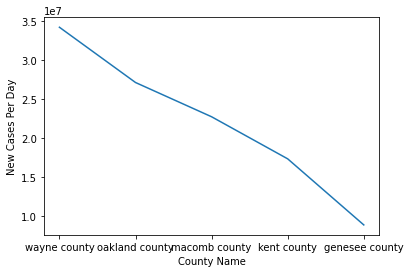

In [136]:
#Ploting a graph using x="County Name", y="New Cases Per Day" 
sb.lineplot(x="County Name", y="New Cases Per Day", data=MI_data_cases)

<AxesSubplot:xlabel='County Name', ylabel='New Deaths Per Day'>

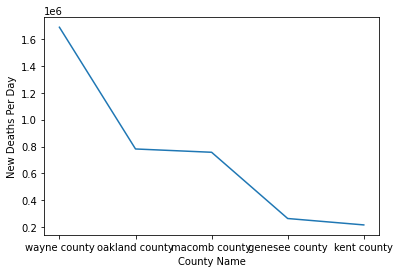

In [137]:
#Ploting graph using x="County Name", y="New Deaths Per Day"
sb.lineplot(x="County Name", y="New Deaths Per Day", data=MI_data_deaths)

In [138]:
MI_data1=final_data[final_data['State']=='MI']
MI_data1=MI_data1.groupby(["County Name","date"]).sum().reset_index()
MI_data1

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population
0,alcona county,2020-01-22,26001,26,0,0,10405
1,alcona county,2020-01-23,26001,26,0,0,10405
2,alcona county,2020-01-24,26001,26,0,0,10405
3,alcona county,2020-01-25,26001,26,0,0,10405
4,alcona county,2020-01-26,26001,26,0,0,10405
...,...,...,...,...,...,...,...
47554,wexford county,2021-08-12,26165,26,2937,48,33631
47555,wexford county,2021-08-13,26165,26,2941,48,33631
47556,wexford county,2021-08-14,26165,26,2941,48,33631
47557,wexford county,2021-08-15,26165,26,2941,48,33631


In [139]:
MI_data1

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population
0,alcona county,2020-01-22,26001,26,0,0,10405
1,alcona county,2020-01-23,26001,26,0,0,10405
2,alcona county,2020-01-24,26001,26,0,0,10405
3,alcona county,2020-01-25,26001,26,0,0,10405
4,alcona county,2020-01-26,26001,26,0,0,10405
...,...,...,...,...,...,...,...
47554,wexford county,2021-08-12,26165,26,2937,48,33631
47555,wexford county,2021-08-13,26165,26,2941,48,33631
47556,wexford county,2021-08-14,26165,26,2941,48,33631
47557,wexford county,2021-08-15,26165,26,2941,48,33631


#Ploting Daily for top 5 counties in Michigan State

In [140]:
wayne_data=MI_data1[MI_data1['County Name']=='wayne county']
wayne_data

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population
46413,wayne county,2020-01-22,26163,26,0,0,1749343
46414,wayne county,2020-01-23,26163,26,0,0,1749343
46415,wayne county,2020-01-24,26163,26,0,0,1749343
46416,wayne county,2020-01-25,26163,26,0,0,1749343
46417,wayne county,2020-01-26,26163,26,0,0,1749343
...,...,...,...,...,...,...,...
46981,wayne county,2021-08-12,26163,26,170477,5225,1749343
46982,wayne county,2021-08-13,26163,26,171056,5229,1749343
46983,wayne county,2021-08-14,26163,26,171056,5229,1749343
46984,wayne county,2021-08-15,26163,26,171056,5229,1749343


In [141]:
wayne_data['New Cases Per Day']=wayne_data['confirmed'].diff()
wayne_data['New deaths Per Day']=wayne_data['deaths'].diff()

C:\Users\hp\AppData\Local\Temp\ipykernel_12672\398672314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wayne_data['New Cases Per Day']=wayne_data['confirmed'].diff()
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\398672314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wayne_data['New deaths Per Day']=wayne_data['deaths'].diff()


In [142]:
wayne_data['New Cases Per Day'] = wayne_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
wayne_data['New deaths Per Day'] = wayne_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)
e=wayne_data.tail(200)
e

C:\Users\hp\AppData\Local\Temp\ipykernel_12672\1335436351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wayne_data['New Cases Per Day'] = wayne_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\1335436351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wayne_data['New deaths Per Day'] = wayne_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)


,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New deaths Per Day
46786,wayne county,2021-01-29,26163,26,96445,3963,1749343,294.0,0.0
46787,wayne county,2021-01-30,26163,26,96685,3982,1749343,240.0,19.0
46788,wayne county,2021-01-31,26163,26,96685,3982,1749343,0.0,0.0
46789,wayne county,2021-02-01,26163,26,97021,3979,1749343,336.0,0.0
46790,wayne county,2021-02-02,26163,26,97228,3995,1749343,207.0,16.0
...,...,...,...,...,...,...,...,...,...
46981,wayne county,2021-08-12,26163,26,170477,5225,1749343,0.0,0.0
46982,wayne county,2021-08-13,26163,26,171056,5229,1749343,579.0,4.0
46983,wayne county,2021-08-14,26163,26,171056,5229,1749343,0.0,0.0
46984,wayne county,2021-08-15,26163,26,171056,5229,1749343,0.0,0.0


<AxesSubplot:xlabel='date', ylabel='New Cases Per Day'>

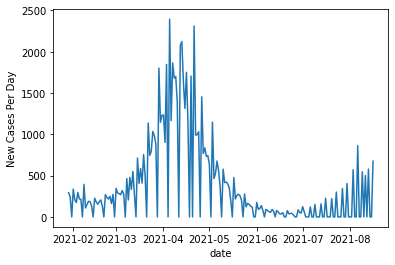

In [143]:
sb.lineplot(x ="date", y="New Cases Per Day", data= e)

<AxesSubplot:xlabel='date', ylabel='New deaths Per Day'>

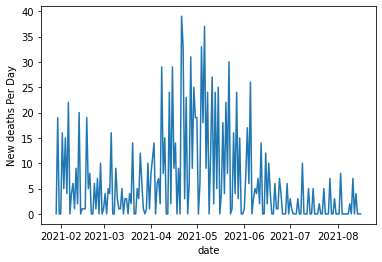

In [144]:
sb.lineplot(x ="date", y="New deaths Per Day", data=e )

In [145]:
oakland_data=MI_data1[MI_data1['County Name']=='oakland county']
oakland_data	

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population
35526,oakland county,2020-01-22,26125,26,0,0,1257584
35527,oakland county,2020-01-23,26125,26,0,0,1257584
35528,oakland county,2020-01-24,26125,26,0,0,1257584
35529,oakland county,2020-01-25,26125,26,0,0,1257584
35530,oakland county,2020-01-26,26125,26,0,0,1257584
...,...,...,...,...,...,...,...
36094,oakland county,2021-08-12,26125,26,122296,2482,1257584
36095,oakland county,2021-08-13,26125,26,122774,2485,1257584
36096,oakland county,2021-08-14,26125,26,122774,2485,1257584
36097,oakland county,2021-08-15,26125,26,122774,2485,1257584


In [146]:
oakland_data['New Cases Per Day']=oakland_data['confirmed'].diff()
oakland_data['New deaths Per Day']=oakland_data['deaths'].diff()


C:\Users\hp\AppData\Local\Temp\ipykernel_12672\4084122479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oakland_data['New Cases Per Day']=oakland_data['confirmed'].diff()
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\4084122479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oakland_data['New deaths Per Day']=oakland_data['deaths'].diff()


In [147]:
oakland_data['New Cases Per Day'] = oakland_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
oakland_data['New deaths Per Day'] = oakland_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)
a=oakland_data.tail(200)
a

C:\Users\hp\AppData\Local\Temp\ipykernel_12672\417151254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oakland_data['New Cases Per Day'] = oakland_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\417151254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oakland_data['New deaths Per Day'] = oakland_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)


,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New deaths Per Day
35899,oakland county,2021-01-29,26125,26,70269,1889,1257584,246.0,0.0
35900,oakland county,2021-01-30,26125,26,70447,1898,1257584,178.0,9.0
35901,oakland county,2021-01-31,26125,26,70447,1898,1257584,0.0,0.0
35902,oakland county,2021-02-01,26125,26,70804,1898,1257584,357.0,0.0
35903,oakland county,2021-02-02,26125,26,71009,1906,1257584,205.0,8.0
...,...,...,...,...,...,...,...,...,...
36094,oakland county,2021-08-12,26125,26,122296,2482,1257584,0.0,0.0
36095,oakland county,2021-08-13,26125,26,122774,2485,1257584,478.0,3.0
36096,oakland county,2021-08-14,26125,26,122774,2485,1257584,0.0,0.0
36097,oakland county,2021-08-15,26125,26,122774,2485,1257584,0.0,0.0


<AxesSubplot:xlabel='date', ylabel='New Cases Per Day'>

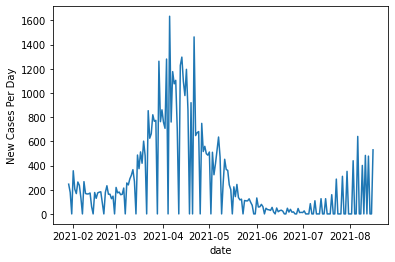

In [148]:
sb.lineplot(x ="date", y="New Cases Per Day", data=a)

<AxesSubplot:xlabel='date', ylabel='New deaths Per Day'>

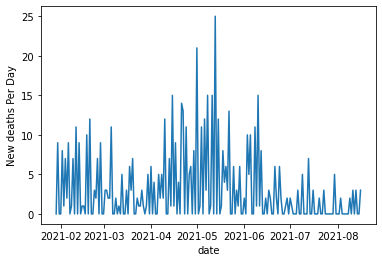

In [149]:
sb.lineplot(x ="date", y="New deaths Per Day", data=a)

In [150]:
macomb_data=MI_data1[MI_data1['County Name']=='macomb county']
macomb_data	

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population
28077,macomb county,2020-01-22,26099,26,0,0,873972
28078,macomb county,2020-01-23,26099,26,0,0,873972
28079,macomb county,2020-01-24,26099,26,0,0,873972
28080,macomb county,2020-01-25,26099,26,0,0,873972
28081,macomb county,2020-01-26,26099,26,0,0,873972
...,...,...,...,...,...,...,...
28645,macomb county,2021-08-12,26099,26,102430,2514,873972
28646,macomb county,2021-08-13,26099,26,102757,2515,873972
28647,macomb county,2021-08-14,26099,26,102757,2515,873972
28648,macomb county,2021-08-15,26099,26,102757,2515,873972


In [151]:
macomb_data['New Cases Per Day']=macomb_data['confirmed'].diff()
macomb_data['New deaths Per Day']=macomb_data['deaths'].diff()

C:\Users\hp\AppData\Local\Temp\ipykernel_12672\59933680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macomb_data['New Cases Per Day']=macomb_data['confirmed'].diff()
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\59933680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macomb_data['New deaths Per Day']=macomb_data['deaths'].diff()


In [152]:
macomb_data['New Cases Per Day'] = macomb_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
macomb_data['New deaths Per Day'] = macomb_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)
b=macomb_data.tail(200)
b


C:\Users\hp\AppData\Local\Temp\ipykernel_12672\1380074665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macomb_data['New Cases Per Day'] = macomb_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\1380074665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macomb_data['New deaths Per Day'] = macomb_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)


,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New deaths Per Day
28450,macomb county,2021-01-29,26099,26,55735,1840,873972,166.0,0.0
28451,macomb county,2021-01-30,26099,26,55852,1860,873972,117.0,20.0
28452,macomb county,2021-01-31,26099,26,55852,1860,873972,0.0,0.0
28453,macomb county,2021-02-01,26099,26,56055,1862,873972,203.0,2.0
28454,macomb county,2021-02-02,26099,26,56176,1868,873972,121.0,6.0
...,...,...,...,...,...,...,...,...,...
28645,macomb county,2021-08-12,26099,26,102430,2514,873972,0.0,0.0
28646,macomb county,2021-08-13,26099,26,102757,2515,873972,327.0,1.0
28647,macomb county,2021-08-14,26099,26,102757,2515,873972,0.0,0.0
28648,macomb county,2021-08-15,26099,26,102757,2515,873972,0.0,0.0


<AxesSubplot:xlabel='date', ylabel='New Cases Per Day'>

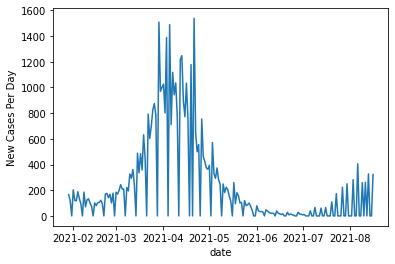

In [153]:
sb.lineplot(x ="date", y="New Cases Per Day", data=b)

<AxesSubplot:xlabel='date', ylabel='New deaths Per Day'>

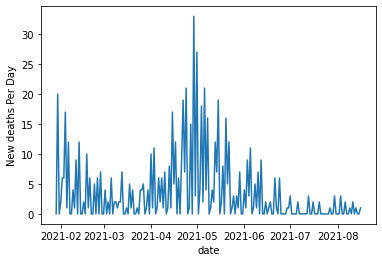

In [154]:
sb.lineplot(x ="date", y="New deaths Per Day", data=b)

In [155]:
kent_data=MI_data1[MI_data1['County Name']=='kent county']
kent_data	

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population
22920,kent county,2020-01-22,26081,26,0,0,656955
22921,kent county,2020-01-23,26081,26,0,0,656955
22922,kent county,2020-01-24,26081,26,0,0,656955
22923,kent county,2020-01-25,26081,26,0,0,656955
22924,kent county,2020-01-26,26081,26,0,0,656955
...,...,...,...,...,...,...,...
23488,kent county,2021-08-12,26081,26,75207,872,656955
23489,kent county,2021-08-13,26081,26,75469,874,656955
23490,kent county,2021-08-14,26081,26,75469,874,656955
23491,kent county,2021-08-15,26081,26,75469,874,656955


In [156]:
kent_data['New Cases Per Day']=kent_data['confirmed'].diff()
kent_data['New deaths Per Day']=kent_data['deaths'].diff()

C:\Users\hp\AppData\Local\Temp\ipykernel_12672\3652704756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kent_data['New Cases Per Day']=kent_data['confirmed'].diff()
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\3652704756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kent_data['New deaths Per Day']=kent_data['deaths'].diff()


In [157]:
kent_data['New Cases Per Day'] = kent_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
kent_data['New deaths Per Day'] = kent_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)
c=kent_data.tail(200)
c


C:\Users\hp\AppData\Local\Temp\ipykernel_12672\200270626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kent_data['New Cases Per Day'] = kent_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\200270626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kent_data['New deaths Per Day'] = kent_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)


,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New deaths Per Day
23293,kent county,2021-01-29,26081,26,49139,650,656955,128.0,5.0
23294,kent county,2021-01-30,26081,26,49242,656,656955,103.0,6.0
23295,kent county,2021-01-31,26081,26,49242,656,656955,0.0,0.0
23296,kent county,2021-02-01,26081,26,49421,656,656955,179.0,0.0
23297,kent county,2021-02-02,26081,26,49516,656,656955,95.0,0.0
...,...,...,...,...,...,...,...,...,...
23488,kent county,2021-08-12,26081,26,75207,872,656955,0.0,0.0
23489,kent county,2021-08-13,26081,26,75469,874,656955,262.0,2.0
23490,kent county,2021-08-14,26081,26,75469,874,656955,0.0,0.0
23491,kent county,2021-08-15,26081,26,75469,874,656955,0.0,0.0


<AxesSubplot:xlabel='date', ylabel='New Cases Per Day'>

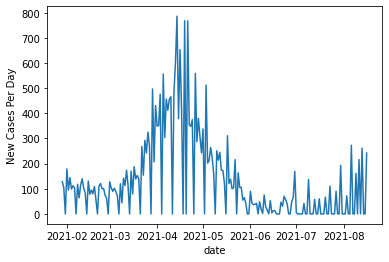

In [158]:
sb.lineplot(x ="date", y="New Cases Per Day", data=c)

<AxesSubplot:xlabel='date', ylabel='New deaths Per Day'>

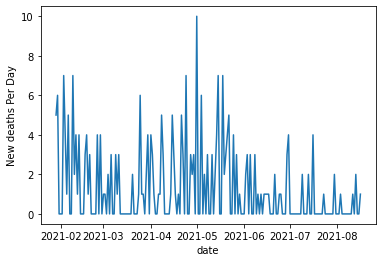

In [159]:
sb.lineplot(x ="date", y="New deaths Per Day", data=c)

In [160]:
genesee_data=MI_data1[MI_data1['County Name']=='genesee county']
genesee_data	

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population
13752,genesee county,2020-01-22,26049,26,0,0,405813
13753,genesee county,2020-01-23,26049,26,0,0,405813
13754,genesee county,2020-01-24,26049,26,0,0,405813
13755,genesee county,2020-01-25,26049,26,0,0,405813
13756,genesee county,2020-01-26,26049,26,0,0,405813
...,...,...,...,...,...,...,...
14320,genesee county,2021-08-12,26049,26,42603,984,405813
14321,genesee county,2021-08-13,26049,26,42738,988,405813
14322,genesee county,2021-08-14,26049,26,42738,988,405813
14323,genesee county,2021-08-15,26049,26,42738,988,405813


In [161]:
genesee_data['New Cases Per Day']=genesee_data['confirmed'].diff()
genesee_data['New deaths Per Day']=genesee_data['deaths'].diff()
d = genesee_data.tail(200)

C:\Users\hp\AppData\Local\Temp\ipykernel_12672\2826131859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genesee_data['New Cases Per Day']=genesee_data['confirmed'].diff()
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\2826131859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genesee_data['New deaths Per Day']=genesee_data['deaths'].diff()


In [162]:
genesee_data['New Cases Per Day'] = genesee_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
genesee_data['New deaths Per Day'] = genesee_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)
d=genesee_data.tail(200)
d



C:\Users\hp\AppData\Local\Temp\ipykernel_12672\1414999968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genesee_data['New Cases Per Day'] = genesee_data['New Cases Per Day'].apply(lambda x: 0 if x < 0 else x)
C:\Users\hp\AppData\Local\Temp\ipykernel_12672\1414999968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genesee_data['New deaths Per Day'] = genesee_data['New deaths Per Day'].apply(lambda x: 0 if x < 0 else x)


,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New deaths Per Day
14125,genesee county,2021-01-29,26049,26,24288,722,405813,38.0,0.0
14126,genesee county,2021-01-30,26049,26,24327,728,405813,39.0,6.0
14127,genesee county,2021-01-31,26049,26,24327,728,405813,0.0,0.0
14128,genesee county,2021-02-01,26049,26,24391,728,405813,64.0,0.0
14129,genesee county,2021-02-02,26049,26,24445,729,405813,54.0,1.0
...,...,...,...,...,...,...,...,...,...
14320,genesee county,2021-08-12,26049,26,42603,984,405813,0.0,0.0
14321,genesee county,2021-08-13,26049,26,42738,988,405813,135.0,4.0
14322,genesee county,2021-08-14,26049,26,42738,988,405813,0.0,0.0
14323,genesee county,2021-08-15,26049,26,42738,988,405813,0.0,0.0


<AxesSubplot:xlabel='date', ylabel='New Cases Per Day'>

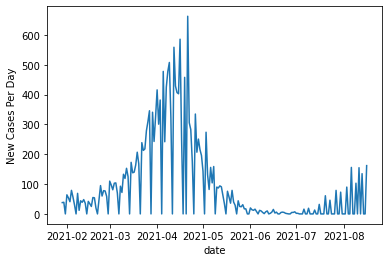

In [163]:
sb.lineplot(x ="date", y="New Cases Per Day", data= d )

<AxesSubplot:xlabel='date', ylabel='New deaths Per Day'>

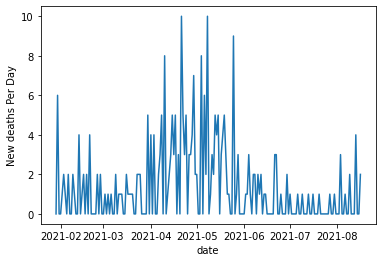

In [164]:
sb.lineplot(x ="date", y="New deaths Per Day", data= d)

In [165]:
MI_data1

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population
0,alcona county,2020-01-22,26001,26,0,0,10405
1,alcona county,2020-01-23,26001,26,0,0,10405
2,alcona county,2020-01-24,26001,26,0,0,10405
3,alcona county,2020-01-25,26001,26,0,0,10405
4,alcona county,2020-01-26,26001,26,0,0,10405
...,...,...,...,...,...,...,...
47554,wexford county,2021-08-12,26165,26,2937,48,33631
47555,wexford county,2021-08-13,26165,26,2941,48,33631
47556,wexford county,2021-08-14,26165,26,2941,48,33631
47557,wexford county,2021-08-15,26165,26,2941,48,33631


In [166]:
MI_data1['New Cases Per Day']=MI_data1['confirmed'].diff()
MI_data1['New deaths Per Day']=MI_data1['deaths'].diff()
MI_data1


,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New deaths Per Day
0,alcona county,2020-01-22,26001,26,0,0,10405,NaN,NaN
1,alcona county,2020-01-23,26001,26,0,0,10405,0.0,0.0
2,alcona county,2020-01-24,26001,26,0,0,10405,0.0,0.0
3,alcona county,2020-01-25,26001,26,0,0,10405,0.0,0.0
4,alcona county,2020-01-26,26001,26,0,0,10405,0.0,0.0
...,...,...,...,...,...,...,...,...,...
47554,wexford county,2021-08-12,26165,26,2937,48,33631,0.0,0.0
47555,wexford county,2021-08-13,26165,26,2941,48,33631,4.0,0.0
47556,wexford county,2021-08-14,26165,26,2941,48,33631,0.0,0.0
47557,wexford county,2021-08-15,26165,26,2941,48,33631,0.0,0.0


In [167]:
MI_data1["normalized values_confirmed"]=( MI_data1["confirmed"]/MI_data1["population"])*100000
MI_data1["normalized values_deaths"]= (MI_data1["deaths"]//MI_data1["population"])*100000
MI_data1

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New deaths Per Day,normalized values_confirmed,normalized values_deaths
0,alcona county,2020-01-22,26001,26,0,0,10405,NaN,NaN,0.000000,0
1,alcona county,2020-01-23,26001,26,0,0,10405,0.0,0.0,0.000000,0
2,alcona county,2020-01-24,26001,26,0,0,10405,0.0,0.0,0.000000,0
3,alcona county,2020-01-25,26001,26,0,0,10405,0.0,0.0,0.000000,0
4,alcona county,2020-01-26,26001,26,0,0,10405,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
47554,wexford county,2021-08-12,26165,26,2937,48,33631,0.0,0.0,8733.014183,0
47555,wexford county,2021-08-13,26165,26,2941,48,33631,4.0,0.0,8744.907972,0
47556,wexford county,2021-08-14,26165,26,2941,48,33631,0.0,0.0,8744.907972,0
47557,wexford county,2021-08-15,26165,26,2941,48,33631,0.0,0.0,8744.907972,0


In [168]:
MI_data1=MI_data1.dropna()
MI_data1

,County Name,date,countyFIPS,StateFIPS,confirmed,deaths,population,New Cases Per Day,New deaths Per Day,normalized values_confirmed,normalized values_deaths
1,alcona county,2020-01-23,26001,26,0,0,10405,0.0,0.0,0.000000,0
2,alcona county,2020-01-24,26001,26,0,0,10405,0.0,0.0,0.000000,0
3,alcona county,2020-01-25,26001,26,0,0,10405,0.0,0.0,0.000000,0
4,alcona county,2020-01-26,26001,26,0,0,10405,0.0,0.0,0.000000,0
5,alcona county,2020-01-27,26001,26,0,0,10405,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
47554,wexford county,2021-08-12,26165,26,2937,48,33631,0.0,0.0,8733.014183,0
47555,wexford county,2021-08-13,26165,26,2941,48,33631,4.0,0.0,8744.907972,0
47556,wexford county,2021-08-14,26165,26,2941,48,33631,0.0,0.0,8744.907972,0
47557,wexford county,2021-08-15,26165,26,2941,48,33631,0.0,0.0,8744.907972,0


In [169]:
norm1=np.log(MI_data1['normalized values_confirmed'])
norm1


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1            -inf
2            -inf
3            -inf
4            -inf
5            -inf
           ...   
47554    9.074866
47555    9.076227
47556    9.076227
47557    9.076227
47558    9.077586
Name: normalized values_confirmed, Length: 47558, dtype: float64

In [170]:
norm2=np.log(MI_data1['normalized values_deaths'])
norm2


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1       -inf
2       -inf
3       -inf
4       -inf
5       -inf
        ... 
47554   -inf
47555   -inf
47556   -inf
47557   -inf
47558   -inf
Name: normalized values_deaths, Length: 47558, dtype: float64